In [1]:
from data_processor.image_processor import ImageProcessor, images_to_arrays, get_parameters
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 2.0
font = {'family' : 'DejaVu Sans',
       'weight' : 'normal',
       'size' : 16.0}
plt.rc('font',**font)

In [28]:
path = 'C:\\Users\\sjurg\\Box\\Sarunas\\MOT_collisions_analysis\\09Dec20'
date = '09Dec20'
file_numbers_rb = np.arange(192,206)
file_numbers_rb_bg = [206]
species = 'CaF' # Here species is CaF because Rb fluorescence images were recored with the CaF camera.
parameter = 'RbMOTLoadTime'
txt_name = 'parameters'

In [43]:
# Get Rb fluorescence images and background
rb_images = images_to_arrays(path, date, file_numbers_rb, species)
rb_images_bg = images_to_arrays(path, date, file_numbers_rb_bg, species)

# Get Rb MOT load times and convert to s.
parameters = get_parameters(path, date, txt_name, file_numbers_rb, parameter) / 1e5

In [44]:
# Instatiate image processor, subtract background and find cloud sizes with 2D Gaussian fits.
rb_fluorescence = ImageProcessor(rb_images, rb_images_bg).subtract_background()
sigma_x, sigma_y = rb_fluorescence.cloud_shape(method='2d_gauss', size_or_pos='size', return_all = False)

In [45]:
sigma_x_mean = sigma_x.mean(axis=1)
sigma_y_mean = sigma_y.mean(axis=1)
sigma_x_std = sigma_x.std(axis=1) / np.sqrt(5)
sigma_y_std = sigma_y.std(axis=1) / np.sqrt(5)

Text(0.5, 0, 'Rb MOT load duration / s')

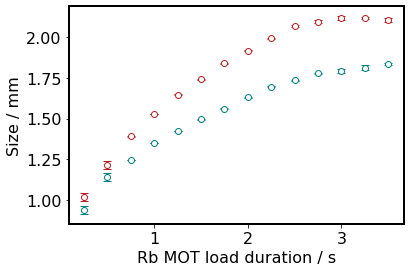

In [46]:
tRb = np.arange(0.25, 3.75, 0.25)
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.errorbar(parameters, sigma_x_mean, yerr=sigma_x_std, color='firebrick', marker='o', markerfacecolor = 'white', 
            markersize=6, linestyle = '', capsize=4)
ax.errorbar(parameters, sigma_y_mean, yerr=sigma_y_std, color='teal', marker='o', markerfacecolor = 'white', 
            markersize=6, linestyle = '', capsize=4)
ax.plot()
ax.set_ylabel('Size / mm')
ax.set_xlabel('Rb MOT load duration / s')

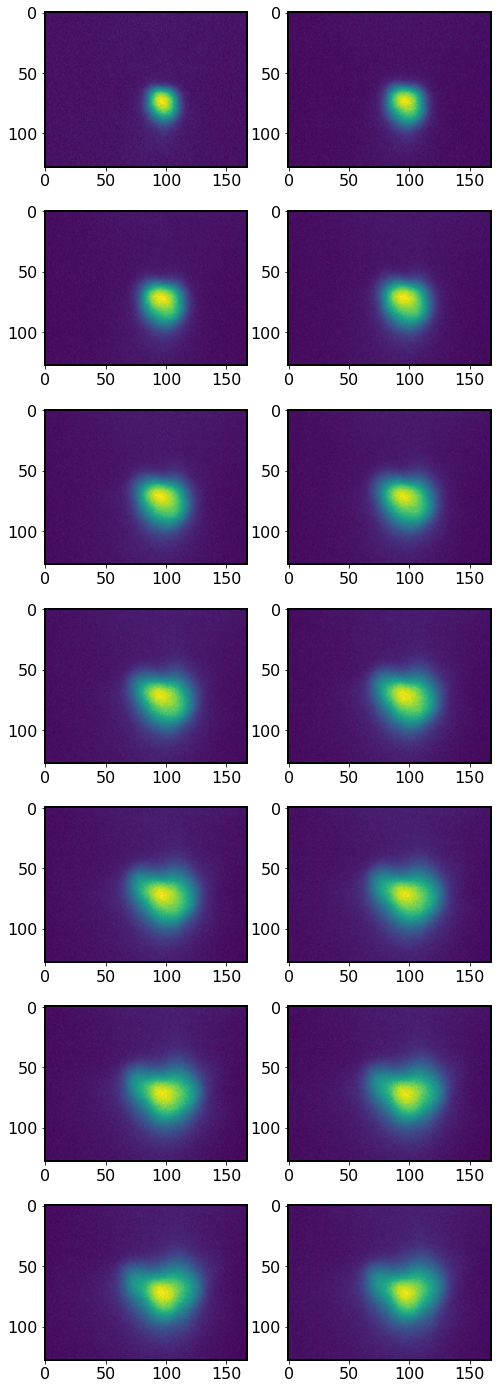

In [64]:
images = rb_fluorescence.image_container.mean(axis=1)

fig, axes = plt.subplots(7, 2, figsize=(8,25))
for i, image in enumerate(images):
    axes.flatten()[i].imshow(image)

In [2]:
path = 'C:\\Users\\sjurg\\Box\\CaF MOT\\MOTData\\MOTMasterData'
date = '15Apr21'
file_numbers = np.arange(231, 240)
file_numbers_bg = [221]
species = 'CaF' # Here species is CaF because Rb fluorescence images were recored with the CaF camera.
parameter = 'SecondMicrowavePulseDuration'
txt_name = 'parameters'

In [3]:
caf_images = images_to_arrays(path, date, file_numbers, species)
caf_images_bg = images_to_arrays(path, date, file_numbers_bg, species)

In [5]:
caf_mw_data = ImageProcessor(caf_images, caf_images_bg).convert_to_two_trigger_data().subtract_two_trigger_background()

In [6]:
parameters = get_parameters(path, date, txt_name, file_numbers, parameter) * 10

In [7]:
mean, err = caf_mw_data.get_normalized_signal()

<ErrorbarContainer object of 3 artists>

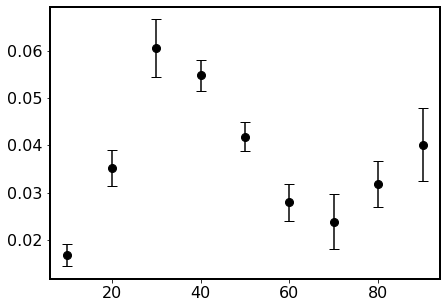

In [8]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.errorbar(parameters, mean, yerr=err, capsize=5, markersize=8, 
            fillstyle='full', fmt='ok', ecolor='black')